In [1]:
import os
import os.path
import numpy as np
import shutil

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [9]:
# Define which folders to parse:
root_dir='/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl'

data_dirs=sorted([d for d in os.listdir(root_dir) if d.startswith('0')])

print("cleaning up "+str(len(data_dirs))+" folders:")
print data_dirs

cleaning up 4736 folders:
['00000_canyon', '00001_canyon', '00002_canyon', '00003_canyon', '00004_canyon', '00005_canyon', '00006_canyon', '00007_canyon', '00008_canyon', '00009_canyon', '00010_canyon', '00011_canyon', '00012_canyon', '00013_canyon', '00014_canyon', '00015_canyon', '00016_canyon', '00017_canyon', '00018_canyon', '00019_canyon', '00020_canyon', '00021_canyon', '00022_canyon', '00023_canyon', '00024_canyon', '00025_canyon', '00026_canyon', '00027_canyon', '00028_canyon', '00029_canyon', '00030_canyon', '00031_canyon', '00032_canyon', '00033_canyon', '00034_canyon', '00035_canyon', '00036_canyon', '00037_canyon', '00038_canyon', '00039_canyon', '00040_canyon', '00041_canyon', '00042_canyon', '00043_canyon', '00044_canyon', '00045_canyon', '00046_canyon', '00047_canyon', '00048_canyon', '00049_canyon', '00050_canyon', '00051_canyon', '00052_canyon', '00053_canyon', '00054_canyon', '00055_canyon', '00056_canyon', '00057_canyon', '00058_canyon', '00059_canyon', '00060_canyon

Printing stats: 

Total number of healthy runs: 4630, unhealthy runs: 4193


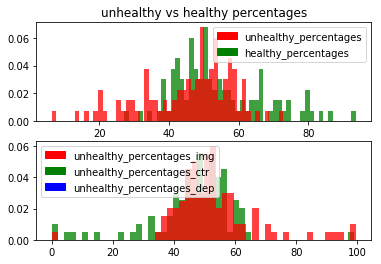

In [64]:
print("Printing stats: \n")
healthy_percentages=[]
unhealthy_percentages=[]
unhealthy_percentages_ctr=[]
unhealthy_percentages_img=[]
unhealthy_percentages_dep=[]

all_healthy=0
all_unhealthy=0

for d in data_dirs:
    healthy=[]
    unhealthy=[]
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
#         print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/predicted_info.txt')
        except:
            unhealthy.append({'name':r,
                             'reason':'no control'})
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                unhealthy.append({'name':r,
                                 'reason':'no control'})
                break
                
            # remove unnecessary RGB and depth images for which there is no control
#             remove_images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
#             remove_depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few images'})
            elif len(depths) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few depth'})
            else:
                healthy.append({'name':r})

    
    healthy_percentages.append(100.*len(healthy)/(len(healthy)+len(unhealthy)))
    unhealthy_percentages.append(100.*len(unhealthy)/(len(healthy)+len(unhealthy)))
    unhealthy_percentages_img.append(100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)))
    unhealthy_percentages_dep.append(100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)))
    unhealthy_percentages_ctr.append(100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy)))
    
    all_healthy+=len(healthy)
    all_unhealthy+=len(unhealthy)
#     print("{0} has {1} healthy and {2} unhealthy runs. \n \t {3:.1f} % lack of images \n \t {4:.1f}% lack of depth \n \t {5:.1f}% lack of control.".format(d,
#     len(healthy), 
#     len(unhealthy), 
#     100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)), 
#     100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)),
#     100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy))))

# 
print("Total number of healthy runs: {0}, unhealthy runs: {1}".format(all_healthy, all_unhealthy))
# healthy runs:
plt.subplot(211)
plt.hist(healthy_percentages, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(unhealthy_percentages, 50, normed=1, facecolor='red', alpha=0.75)
plt.title('unhealthy vs healthy percentages')

red_patch = mpatches.Patch(color='red', label='unhealthy_percentages')
green_patch = mpatches.Patch(color='green', label='healthy_percentages')
plt.legend(handles=[red_patch, green_patch])

plt.subplot(212)
plt.hist(unhealthy_percentages_ctr, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(unhealthy_percentages_img, 50, normed=1, facecolor='red', alpha=0.75)
# n, bins, patches = plt.hist(unhealthy_percentages_dep, 50, normed=1, facecolor='blue', alpha=0.75)
# plt.title('unhealthy due to control (green) vs images (red) in percentages')

green_patch = mpatches.Patch(color='green', label='unhealthy_percentages_ctr')
red_patch = mpatches.Patch(color='red', label='unhealthy_percentages_img')
blue_patch = mpatches.Patch(color='blue', label='unhealthy_percentages_dep')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.show()

In [75]:
# Go through data and remove useless runs:
for d in data_dirs:
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
        print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/predicted_info.txt')
        except:
            print('delete.')
            shutil.rmtree(r)
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                print('delete.')
                shutil.rmtree(r)
                break 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10: 
                print('delete.')
                shutil.rmtree(r)
            elif len(depths) < 10: 
                print('delete.')
                shutil.rmtree(r)
            else:
                # cleanup useless images
                remove_images=sorted([r+'/RGB/'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] )
                remove_depths=sorted([r+'/Depth/'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] )
#                 print sorted(remove_images)
#                 print sorted(remove_depths)
#                 import pdb;pdb.set_trace()
                for f in remove_images: os.remove(f)
                for f in remove_depths: os.remove(f)

/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00023_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00028_canyon
/esat/op

/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00040_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00041_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00051_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00062_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_12/00063

/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00031_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00033_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00034_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00040_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00051_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_16/00058

/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00077_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00079_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00082_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00085_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00088_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00093_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_2/00094_canyon
/esat/op

/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00029_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00030_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00031_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00033_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00034_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00035_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_23/00058

/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00018_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00023_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00025_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00026_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00027_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00028_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00029_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00030

/esat/opal/kkelchte/docker_home/pilot_data/rec_30/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_30/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_30/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_30/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_30/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_30/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_31/00015

/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00045_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00055_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00061

/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00018_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00029_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00031_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_38/00033

/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00038_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00040_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00041_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00051_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00055

/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00055_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00062_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00065_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00067_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00068_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_43/00069

/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00023_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00025

/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00094_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00095_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00096_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00097_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00098_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_49/00104_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00028_canyon


/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00018_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00023

/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00045_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00063_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00068_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00070_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_56/00079

/esat/opal/kkelchte/docker_home/pilot_data/rec_6/00041_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_6/00042_canyon
delete.
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00018_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00028_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60/00033_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_60

/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00069_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00073_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00081_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00088_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00093_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00095_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_64/00096

/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00093_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00094_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00096_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00026_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00030_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_68/00031

/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00065_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00070_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00072_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00073_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00074_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_72/00075

/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00075_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00077_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00079_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00081_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00088_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00094_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_78/00099_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_79/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_79/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_79/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_79/00003

/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00030_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00031_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00034_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00036_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00038_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00041_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_82/00045

/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00025_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00026_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00028_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00029_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_86/00030

/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00084_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00088_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00094_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00095_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00097_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_89/00098_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_9/00026_canyon
/

/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00034_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00036_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00041_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00051_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00055_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00062_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_93/00063

/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00069_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00072_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00074_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00076_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00081_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00082_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00085_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_97/00093

In [76]:
# make a final check on current data: --> in case there are still unhealthy runs rerun previous window a few times...
all_healthy=0
all_unhealthy=0

for d in data_dirs:
    healthy=[]
    unhealthy=[]
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
#         print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/predicted_info.txt')
        except:
            unhealthy.append({'name':r,
                             'reason':'no control'})
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                unhealthy.append({'name':r,
                                 'reason':'no control'})
                break
                
            # remove unnecessary RGB and depth images for which there is no control
#             remove_images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
#             remove_depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few images'})
            elif len(depths) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few depth'})
            else:
                healthy.append({'name':r})
    print("{0} has {1} healthy and {2} unhealthy runs. \n \t {3:.1f} % lack of images \n \t {4:.1f}% lack of depth \n \t {5:.1f}% lack of control.".format(d,
    len(healthy), 
    len(unhealthy), 
    100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)), 
    100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)),
    100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy))))
    all_healthy+=len(healthy)
    all_unhealthy+=len(unhealthy)
print("Total number of healthy runs: {0}, unhealthy runs: {1}".format(all_healthy, all_unhealthy))


rec_1 has 48 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_10 has 53 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_100 has 46 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_11 has 58 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_12 has 47 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_13 has 50 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_14 has 50 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_15 has 58 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_16 has 56 healthy and 0 unhealthy runs. 
 	 0.0 % la

rec_83 has 47 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_84 has 45 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_85 has 59 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_86 has 41 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_87 has 56 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_88 has 47 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_89 has 55 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_9 has 28 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_90 has 51 healthy and 0 unhealthy runs. 
 	 0.0 % lac

In [10]:
runs=sorted([root_dir+'/'+d for d in data_dirs])
for r in runs:
    print r
    collision_file=open(r+'/collision_info.txt','w')
    images=sorted([int(im.split('.')[0]) for im in os.listdir(r+'/RGB')])
    print images
    collision_labels={im:0 if im in images[:-10] else 1 for im in images}
    for k in sorted(collision_labels.keys()): 
#         print("{0:010d} {1}\n".format(k, collision_labels[k]))
        collision_file.write("{0:010d} {1}\n".format(k, collision_labels[k]))
    collision_file.close()
        

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00000_canyon
[50, 52, 54, 56, 57, 60, 62, 64, 66, 68, 70]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00001_canyon
[16, 18, 19, 22, 24, 26, 28, 29, 32, 34, 35, 38]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00002_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 35, 38]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00003_canyon
[16, 18, 20, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 42, 45, 47, 48, 51, 53, 54, 57, 59, 60, 63, 65, 67, 69, 71, 73, 75, 77, 79, 80, 82, 84, 87, 89]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00004_canyon
[16, 18, 20, 22, 23, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 59, 62, 63, 66, 68, 69, 71, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 95, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 123, 126, 128, 130, 132, 133, 136, 138, 140, 142, 144, 146, 148, 149, 152, 154, 156, 157, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00263_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00264_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00265_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00266_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00267_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00268_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00519_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00520_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00521_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152,

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00803_canyon
[16, 18, 20, 22, 23, 25, 28, 29, 32, 33, 35, 38, 39, 41, 43, 45, 48, 50, 52, 54, 56, 58, 59, 62, 63, 66, 68, 69, 72, 74, 75, 77, 80, 82, 83, 86, 87, 90, 92, 94, 96, 98, 100, 101, 104, 106, 108, 110, 112, 113, 116, 117, 120, 122, 123, 125, 127, 129, 132, 133, 136, 138, 140, 142, 144, 146, 148, 150, 151, 153, 155, 158, 159, 162, 163, 166, 168, 170, 172]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00804_canyon
[16, 18, 20, 22, 23, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 51, 54, 56, 58, 60, 62, 64, 66, 67, 70, 72, 74, 76, 77, 80, 82, 84, 86, 88, 90]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00805_canyon
[16, 17, 20, 22, 24, 26, 27, 30, 32, 34, 36, 37, 40, 42, 43, 46, 48, 50, 52, 54, 56, 57, 60, 62, 63, 66, 67, 70, 72, 74, 76, 78, 80, 81, 83, 86, 88, 89, 92, 93, 96]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/00806_canyon
[16, 18, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40, 42, 45, 47,

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01071_canyon
[16, 18, 19, 20, 21, 22, 24, 25, 26, 29, 30, 32, 34, 37, 39, 40, 42, 44, 47, 48, 51, 53, 55, 57, 59, 61, 62, 65, 67, 68, 70, 73, 75, 77, 79, 80, 82, 85, 86, 88, 90, 93, 95, 97, 99, 101, 103]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01072_canyon
[16, 18, 20, 22, 23, 24, 26, 28, 29, 30, 32, 34, 36, 38, 40, 41, 42, 44, 45, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 89, 92, 94, 96, 98, 100, 102, 104, 106, 108, 109, 112, 114, 116, 118, 119, 121, 123, 125, 128, 130, 131, 134, 136, 138, 140, 142, 144, 146, 147, 150, 151, 154, 156, 157, 159, 161, 164, 166, 168, 169, 171, 173, 175, 178, 179, 182, 184, 186, 188, 189, 191, 193, 195, 197, 199, 202, 204, 206, 207, 210, 211, 214, 215, 217, 220, 222, 223, 225, 227, 229, 231, 233, 235, 238, 239, 241, 243, 246, 248, 250, 252, 254, 255, 257, 260, 261, 264, 265, 267, 269, 271, 274, 275, 278, 280, 282, 284, 286, 288, 290, 292, 294, 29

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01330_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01331_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01332_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01333_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01334_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 44, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79]
/esat/opal/kkelchte/docker_home/pilot_data/canyo

[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 60, 62, 65, 66, 68, 70, 72, 74, 77, 78, 81, 83, 85, 87, 89, 90, 92, 95, 97, 99, 101, 103, 105, 107, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 231, 233, 234, 236, 238, 240, 242, 244, 246, 248, 250, 253, 255, 256, 259, 260, 262, 264, 267, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 339, 341, 342, 344, 346, 349, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 395, 396, 398, 400, 402, 404, 406, 409, 410, 412, 414, 417, 419, 421, 422, 425, 426, 429, 431, 4

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01835_canyon
[16, 19, 21, 23, 24, 26, 28, 31, 32, 35, 36]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/01836_canyon
[16, 18, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 39, 41, 44, 46, 48, 50, 52, 54, 55, 58, 60, 61, 63, 66, 67, 69, 72, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 96, 98, 99, 102, 104, 105, 108, 110, 112, 114, 116, 118, 119, 121, 124, 126, 128, 130, 132, 134, 136, 137, 140, 141, 144, 146, 148, 150, 152, 153, 156, 157, 159, 161, 163, 166, 168, 170, 172, 174, 176, 178, 179, 181, 184, 186, 188, 190, 192, 194, 195, 198, 199, 201, 204, 206, 207, 209, 211, 213, 215, 217, 220, 222, 223, 225, 227, 230, 231, 234, 236, 238, 239, 242, 244, 246, 248, 250, 251, 254, 256, 258, 260, 262, 264, 266, 268, 269, 272, 273, 275, 278, 280, 282, 284, 286, 287, 290, 291, 294, 296, 298, 300, 301, 304, 306, 308, 310, 312, 314, 316, 317, 320, 322, 323, 325, 327, 329, 331, 334, 335, 338, 340, 342, 344, 346, 348, 350, 351, 353, 355, 358, 360, 

[16, 17, 20, 22, 23, 25, 27, 29, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 55, 58, 59, 61, 64, 66, 68, 69, 71, 74, 76, 78, 80, 81, 84, 86, 87, 90, 92, 94, 96, 98, 100, 101, 104, 105, 108, 110, 112, 114, 116, 118, 119, 122, 123, 126, 127, 129, 131, 133, 135, 138, 140, 142, 143, 146, 148, 150, 152, 153, 155, 157, 159, 161, 163, 166, 167, 169, 172, 174, 175, 177, 180, 182, 184, 186, 188, 190, 192, 193, 196, 197, 200, 201, 203, 205, 208, 210, 212, 213, 215, 217, 220, 221, 223, 226, 227, 230, 231, 234, 236, 237, 239, 241, 243, 245, 247, 249, 251, 254, 255, 258, 259, 261, 264, 265, 268, 270, 272, 274, 276, 278]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02102_canyon
[17, 18, 20, 23, 24, 26, 28, 30, 32, 35, 36, 38, 40, 43, 45]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02103_canyon
[16, 17, 20, 22, 24, 25, 27, 30, 32, 34, 35, 38, 40, 42, 44, 46, 48, 49, 51, 54, 56, 58, 60, 62, 63, 66, 67, 70, 72, 74, 75]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02104_cany

[16, 17, 19, 21, 23, 24, 26, 28, 30, 32, 34, 36]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02342_canyon
[17, 19, 21, 23, 25, 26, 28, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 50, 53, 54, 56, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 92, 94, 97, 99, 101, 103, 105, 107, 109, 111, 113, 114, 117, 118, 121, 123, 125, 127, 129, 131, 133, 135, 136, 139, 141, 143, 145, 147, 148, 151, 153, 155, 157, 158, 161, 162, 165, 167, 169, 171, 172, 174, 176, 178, 181, 183, 184, 187, 189, 190, 192, 195, 197, 199, 201, 203, 205, 207, 209, 211, 212, 214, 216, 218, 221, 223, 225, 227, 228, 231, 233, 235, 237, 238, 240, 242]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02343_canyon
[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 28, 30, 32, 34, 36, 38, 39, 41, 44, 46, 48, 49, 52, 54, 56, 58, 60, 62, 64, 66, 67, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 93, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 117, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02627_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02628_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02629_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02630_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02932_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02933_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02934_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02935_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02936_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/02937_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41,

[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03223_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03224_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03225_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03226_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03227_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03228_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03229_canyon
[16, 18, 20

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03552_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03553_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03554_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03555_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03556_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03557_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03856_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03857_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03858_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03859_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03860_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03861_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58]
/esat/opal/kkelchte/docker_hom

[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03924_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03925_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03926_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03927_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03928_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/03929_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/

[17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04100_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04101_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04102_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04103_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04104_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04105_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04106_canyon
[17, 19, 21, 23

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04395_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04396_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04397_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04398_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04399_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 

[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04678_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04679_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04680_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04681_canyon
[17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl/04682_canyon
[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
/esat/

In [88]:
# For all remaining runs: create collision labels
for d in data_dirs:
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
        print r
        collision_file=open(r+'/collision_info.txt','w')
        images=sorted([int(im.split('.')[0]) for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] )
#         print images
        collision_labels={im:0 if im in images[:-10] else 1 for im in images}
        for k in sorted(collision_labels.keys()): 
            collision_file.write("{0:010d} {1}\n".format(k, collision_labels[k]))
        collision_file.close()
        

/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00023_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00028_canyon
/esat/op

/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00073_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00074_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00075_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00076_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00077_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00081_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00084_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_14/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_15/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_15/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_15/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_15/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_15/00005

/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00071_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00072_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00074_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00076_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00081_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00085_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_20/00095_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_21/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_21/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_21/00004

/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00033_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00035_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00036_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00038_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00051_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_28/00053

/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00055_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00056_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00063_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00068_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00073_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00076_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_34/00081

/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00026_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00027_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00028_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00029_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00030_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00031_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00033_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00034_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00035_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00038_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00040_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_41/00041

/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00019_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00020_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00021_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00022_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00023_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00024_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00025_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00027_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00028_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00030_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00031_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_47/00033

/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00093_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00094_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00100_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00101_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_51/00104_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_52/00012

/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00076_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00077_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00079_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00084_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00085_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00088_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00095_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_59/00096

/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00062_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00063_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00065_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00067_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00068_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00069_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00070_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00072_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00073_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_67/00074

/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00049_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00063_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00065_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00069_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00070_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00075_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_77/00081

/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00038_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00039_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00041_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00042_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00043_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00044_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00047_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_84/00063

/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00025_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00027_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00029_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00030_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00032_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00037_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00065_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_91/00069

/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00046_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00048_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00050_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00051_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00052_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00053_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00054_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00055_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00057_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00062_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00063_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00068_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00069_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_98/00070

In [ ]:
# Create train, val and test set